In [31]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%pwd

'/home/kyudan/AnomLLM/src'

In [33]:
%cd ..
%cd src

/home/kyudan/AnomLLM
/home/kyudan/AnomLLM/src


In [34]:
%pwd

'/home/kyudan/AnomLLM/src'

In [35]:
from prompt import time_series_to_image
from utils import view_base64_image, display_messages, collect_results
from data.synthetic import SyntheticDataset

data_name = 'point'
data_dir = f'/home/kyudan/AnomLLM/data/synthetic/{data_name}/eval/'
train_dir = f'/home/kyudan/AnomLLM/data/synthetic/{data_name}/train/'
eval_dataset = SyntheticDataset(data_dir)
eval_dataset.load()
train_dataset = SyntheticDataset(train_dir)
train_dataset.load()

Loaded dataset point with 400 series.
Loaded dataset point with 400 series.


In [36]:
from utils import plot_series_and_predictions
from utils import view_base64_image, display_messages, collect_results
idx = 0
directory = f'/home/kyudan/AnomLLM/results/synthetic/{data_name}'
series = eval_dataset[idx][1].numpy() # eval dataset의 문제 series.
anomaly_locations = eval_dataset[idx][0].numpy() # eval dataset의 gt가 될 것.

raw_results = collect_results(directory, raw=True)
raw_results = {k: v[idx] for k, v in raw_results.items()}


{'gpt-4o-mini (0shot-text)': {'custom_id': 'point_gpt-4o-mini_0shot-text_00001',
  'request': {'messages': [{'role': 'user',
     'content': '0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0.95 -0.88 -0.77 -0.64 -0.48 -0.31 -0.13 0.06 0.25 0.43 0.59 0.73 0.84 0.93 0.98 1.0 0.98 0.93 0.84 0.73 0.59 0.43 0.25 0.06 -0.13 -0.31 -0.48 -0.64 -0.77 -0.88 -0.95 -0.99 -1.0 -0.97 -0.9 -0.81 -0.68 -0.54 -0.37 -0.19 -0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0.
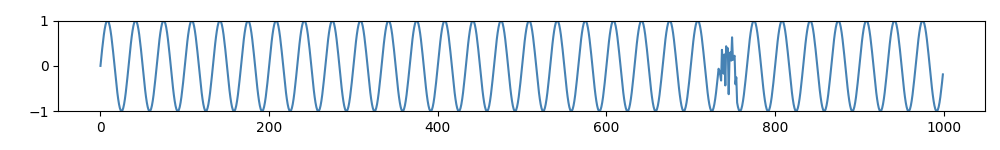
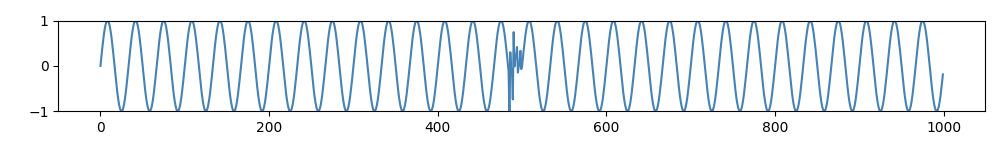
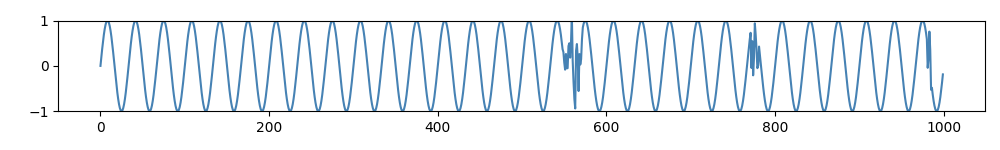
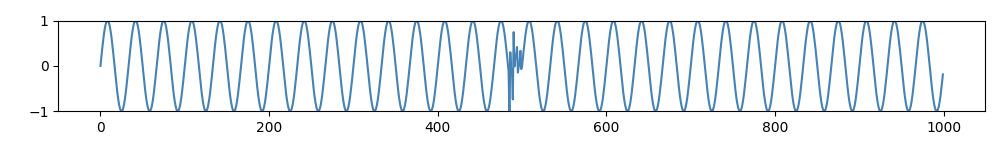

In [37]:
raw_results

-1.22 0.3 -0.13 -0.08 -0.74 0.74 -0.01 0.18 0.21 0.42 -0.15 -0.01 0.05 0.33 -0.07 -0.0

In [38]:
anomaly_locations

array([[[485., 500.]]], dtype=float32)

In [39]:
results = collect_results(directory)
results = {k: v[idx] for k, v in results.items()}

"""fig = plot_series_and_predictions(
    series=series, 
    gt_anomaly_intervals=anomaly_locations,
    anomalies=results
)"""

'fig = plot_series_and_predictions(\n    series=series, \n    gt_anomaly_intervals=anomaly_locations,\n    anomalies=results\n)'

In [40]:
from utils import display_messages

display_messages(raw_results['gemini-1.5-flash (localization)']['request']['messages'])

KeyError: 'gemini-1.5-flash (localization)'

In [41]:
raw_results['gemini-1.5-flash (localization)']

KeyError: 'gemini-1.5-flash (localization)'

In [42]:
from utils import display_messages

display_messages(raw_results['gemini-1.5-flash (localization)']['request']['messages'])

KeyError: 'gemini-1.5-flash (localization)'

In [43]:
print(list(raw_results.values())[0]['response'])

```json
[{"start": 208, "end": 209}, {"start": 210, "end": 211}, {"start": 212, "end": 213}, {"start": 214, "end": 215}, {"start": 216, "end": 217}]
```


In [44]:
anomaly_locations[0]

array([[485., 500.]], dtype=float32)

In [45]:
from utils import interval_to_vector
gt = interval_to_vector(anomaly_locations[0])
# interval_to_vector 를 하면 gt의 구간에 대해서 1 로 바뀜.
# 0 0 0 0 0 0 1 1 1 0 0 0 0 0 

In [46]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from affiliation.generics import convert_vector_to_events
from affiliation.metrics import pr_from_events
from utils import compute_metrics

data = {}

for name, prediction in results.items():
    metrics = compute_metrics(gt, prediction)
    data[name] = metrics

df = pd.DataFrame(data).T
df


,precision,recall,f1,affi precision,affi recall,affi f1
gpt-4o-mini (0shot-text),0.0,0.000,0.000,0.440,0.449,0.444
gpt-4o-mini (1shot-vision),0.0,0.000,0.000,0.496,0.517,0.506
gemini-1.5-flash (0shot-text),0.0,0.000,0.000,0.158,0.161,0.159
gemini-1.5-flash (localization (rawData)),0.0,0.000,0.000,0.176,0.191,0.183
gemini-1.5-flash (1shot-vision),0.5,1.000,0.667,0.988,1.000,0.994
gemini-1.5-flash (1shot-text),0.0,0.000,0.000,0.596,0.603,0.599
gemini-1.5-flash (localization (indexData)),1.0,0.933,0.966,1.000,1.000,1.000


In [47]:
# Keep only the first four columns
df = df.iloc[:, :4].fillna(0)

In [48]:
{k: v['response'] for k, v in raw_results.items()}

{'gpt-4o-mini (0shot-text)': '```json\n[{"start": 208, "end": 209}, {"start": 210, "end": 211}, {"start": 212, "end": 213}, {"start": 214, "end": 215}, {"start": 216, "end": 217}]\n```',
 'gpt-4o-mini (1shot-vision)': '[{"start": 734, "end": 755}]',
 'gemini-1.5-flash (0shot-text)': '```json\n[{"start": 70, "end": 71}, {"start": 72, "end": 73}]\n```\n',
 'gemini-1.5-flash (localization (rawData))': '```json\n[{"start": 73, "end": 88}]\n```\n',
 'gemini-1.5-flash (1shot-vision)': '[{"start": 480, "end": 510}]',
 'gemini-1.5-flash (1shot-text)': '```json\n[{"start": 286, "end": 287}, {"start": 288, "end": 294}]\n```\n',
 'gemini-1.5-flash (localization (indexData))': '```json\n[{"start": 485, "end": 499}]\n```\n'}

In [49]:
from utils import highlight_by_ranking
from IPython.core.display import HTML
styled_df = highlight_by_ranking(df.T).T
HTML(styled_df.to_html(escape=False))


,precision,recall,f1,affi precision
gpt-4o-mini (0shot-text),0.00,0.00,0.00,44.00
gpt-4o-mini (1shot-vision),0.00,0.00,0.00,49.60
gemini-1.5-flash (0shot-text),0.00,0.00,0.00,15.80
gemini-1.5-flash (localization (rawData)),0.00,0.00,0.00,17.60
gemini-1.5-flash (1shot-vision),50.00,100.00,66.70,98.80
gemini-1.5-flash (1shot-text),0.00,0.00,0.00,59.60
gemini-1.5-flash (localization (indexData)),100.00,93.30,96.60,100.00


In [50]:
results = collect_results(directory)

In [51]:
import numpy as np
import pandas as pd
from tqdm import trange
from utils import compute_metrics, interval_to_vector

# Initialize dictionary to store results
metric_names = ['precision', 'recall', 'f1', 'affi precision', 'affi recall', 'affi f1']

results_dict = {
    key: [[] for _ in metric_names] for key in results.keys()
}

# Initialize DataFrame to store results
df_list = []

for i in trange(0, 400):
    series = eval_dataset[idx][1].numpy()
    anomaly_locations = eval_dataset[idx][0].numpy()
    gt = interval_to_vector(anomaly_locations[0])

    for name, prediction in results.items():
        metrics = compute_metrics(gt, prediction[i])
        for idx, metric_name in enumerate(metric_names):
            results_dict[name][idx].append(metrics[metric_name])

# Convert dictionary to DataFrame
df = pd.DataFrame({k: np.mean(v, axis=1) for k, v in results_dict.items()}, 
                  index=['precision', 'recall', 'f1', 'affi precision', 'affi recall', 'affi f1'])

df.T

 71%|███████   | 283/400 [00:04<00:01, 60.60it/s]


IndexError: list index out of range

In [52]:
styled_df = highlight_by_ranking(df).T
# To visualize the output in Jupyter Notebook
from IPython.core.display import HTML
HTML(styled_df.to_html(escape=False))

,gpt-4o-mini (0shot-text),gpt-4o-mini (1shot-vision),gemini-1.5-flash (0shot-text),gemini-1.5-flash (localization (rawData)),gemini-1.5-flash (1shot-vision),gemini-1.5-flash (1shot-text),gemini-1.5-flash (localization (indexData))
PRE,0.00,0.00,0.00,0.00,50.00,0.00,100.00
REC,0.00,0.00,0.00,0.00,100.00,0.00,93.30
F1,0.00,0.00,0.00,0.00,66.70,0.00,96.60
affi PRE,44.00,49.60,15.80,17.60,98.80,59.60,100.00


In [ ]:
from utils import styled_df_to_latex

latex_table = styled_df_to_latex(styled_df, "Point Anomalies in Sine Wave", label="point_exp")
print(latex_table)

\begin{longtable}{lrrrrrr}
\caption{Point Anomalies in Sine Wave} \label{tab:point_exp} \\
\toprule
& \small\fontfamily{cmtt}\selectfont{gpt-4o-mini} & \small\fontfamily{cmtt}\selectfont{gpt-4o-mini} & \small\fontfamily{cmtt}\selectfont{gemini-1.5-flash} & \small\fontfamily{cmtt}\selectfont{gemini-1.5-flash} & \small\fontfamily{cmtt}\selectfont{gemini-1.5-flash} & \small\fontfamily{cmtt}\selectfont{gemini-1.5-flash} \\
& \small\fontfamily{cmtt}\selectfont{(0shot-text)} & \small\fontfamily{cmtt}\selectfont{(1shot-vision)} & \small\fontfamily{cmtt}\selectfont{(localization)} & \small\fontfamily{cmtt}\selectfont{(0shot-text)} & \small\fontfamily{cmtt}\selectfont{(1shot-vision)} & \small\fontfamily{cmtt}\selectfont{(1shot-text)} \\ \endfirsthead
\multicolumn{7}{c}{\tablename\ \thetable\ -- continued from previous page} \\
\toprule
& \small\fontfamily{cmtt}\selectfont{gpt-4o-mini} & \small\fontfamily{cmtt}\selectfont{gpt-4o-mini} & \small\fontfamily{cmtt}\selectfont{gemini-1.5-flash} & \sma